# Imports

In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import *
from qiskit import QuantumCircuit, Aer
from qiskit import IBMQ
from qiskit.visualization import plot_histogram

IBMQ.load_account()

# Functions to create a QFT and the add part of the QFTA circuit

In [2]:
def qft(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft(circuit, n)

In [3]:
def phaseAdd(circ, regLen):
    circuit = QuantumCircuit(regLen*2, name='Add')
    for i in range(regLen):
        for j in range(i, regLen):
            circuit.cp((pi)/(2)**(j-i), i, regLen+j)

    circ.append(circuit, circ.qubits)
    return circuit

In [4]:
qft2 = QuantumCircuit(2, name='QFT')
qft(qft2, 2)

qfti2 = qft2.inverse()
qfti2.name = 'IQFT'

In [5]:
qft3 = QuantumCircuit(3, name='QFT')
qft(qft3, 3)

qfti3 = qft3.inverse()
qfti3.name = 'IQFT'

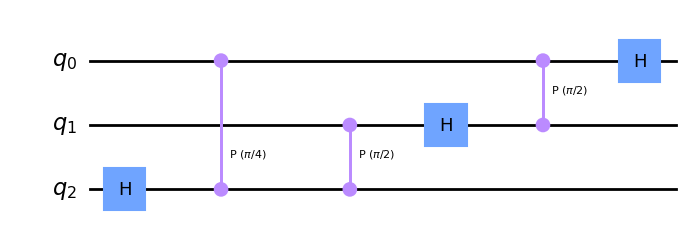

In [6]:
qft3.draw('mpl')

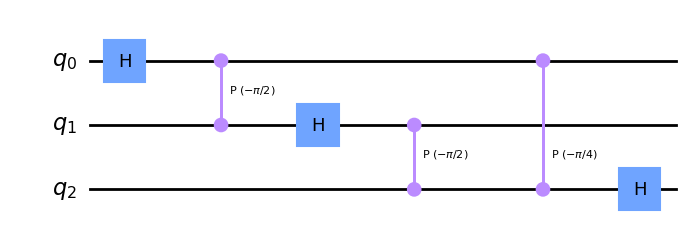

In [7]:
qfti3.draw('mpl')

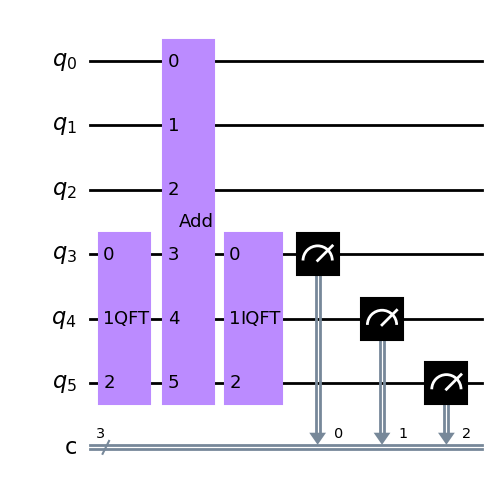

In [8]:
adder = QuantumCircuit(6,3)
adder.append(qft3, adder.qubits[3:])
phaseAdd(adder, 3)
adder.append(qfti3, adder.qubits[3:])
adder.measure([3,4,5], [0,1,2])
adder.draw('mpl')

# Function that takes in 2 2 bit binary number and returns the sum

In [9]:
def sum2(a, b):
    a = list(a[::-1])
    b = list(b[::-1])
    a = [i for i, x in enumerate(a) if x == '1']
    b = [i+2 for i, x in enumerate(b) if x == '1']
    adder = QuantumCircuit(4,2)
    if (a):
        adder.x(a)
    if (b):
        adder.x(b)
    adder.append(qft2, adder.qubits[2:])
    phaseAdd(adder, 2)
    adder.append(qfti2, adder.qubits[2:])
    adder.measure([2,3], [0,1])
    return adder
    

Classical simulation

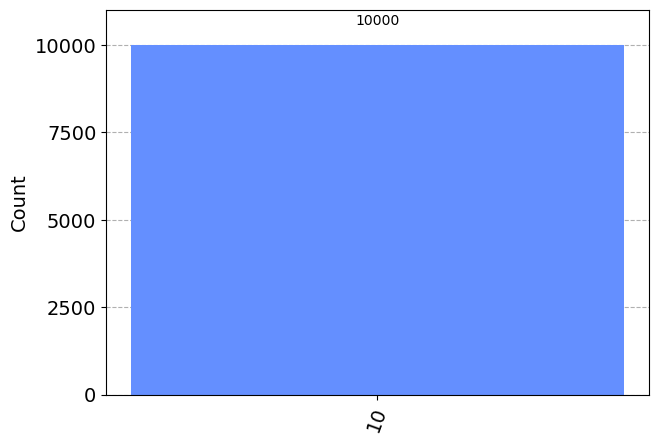

In [12]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum2(a, b)
simulator = Aer.get_backend('qasm_simulator')
job = execute(adder, simulator, shots=10000)
result = job.result().get_counts()
plot_histogram(result)

Run on Quantum computer

/var/folders/md/4zhz38fs2rn1cm3sh6w4bcbr0000gn/T/ipykernel_36329/3355542837.py:5: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/var/folders/md/4zhz38fs2rn1cm3sh6w4bcbr0000gn/T/ipykernel_36329/3355542837.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


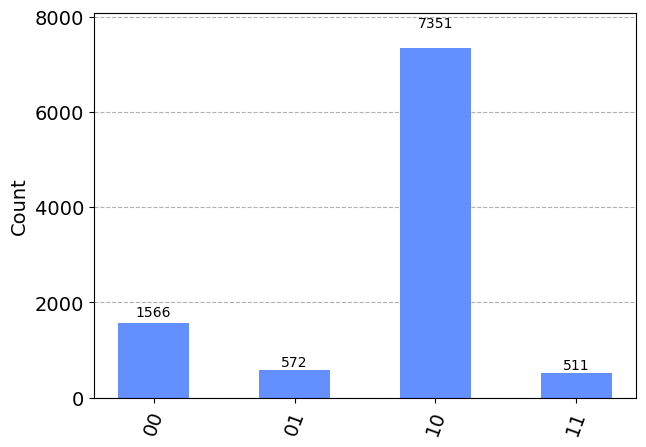

In [11]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum2(a, b)
#run on real quantum computer
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_belem')
job = execute(adder, backend, shots=10000)
result = job.result().get_counts()
plot_histogram(result)

# Function that takes in 2 3 bit binary number and returns the sum

In [22]:
def sum3(a, b):
    a = list(a[::-1])
    b = list(b[::-1])
    a = [i for i, x in enumerate(a) if x == '1']
    b = [i+3 for i, x in enumerate(b) if x == '1']
    adder = QuantumCircuit(6,3)
    if (a):
        adder.x(a)
    if (b):
        adder.x(b)
    adder.append(qft3, adder.qubits[3:])
    phaseAdd(adder, 3)
    adder.append(qfti3, adder.qubits[3:])
    adder.measure([3,4,5], [0,1,2])
    
    return adder
    

Simulate on classical computer

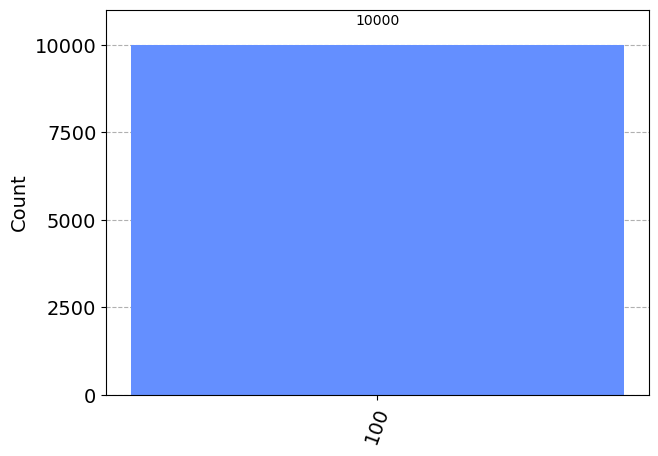

In [23]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum3(a, b)
simulator = Aer.get_backend('qasm_simulator')
job = execute(adder, simulator, shots=10000)
result = job.result().get_counts()
plot_histogram(result)

Run in Quantum Computer

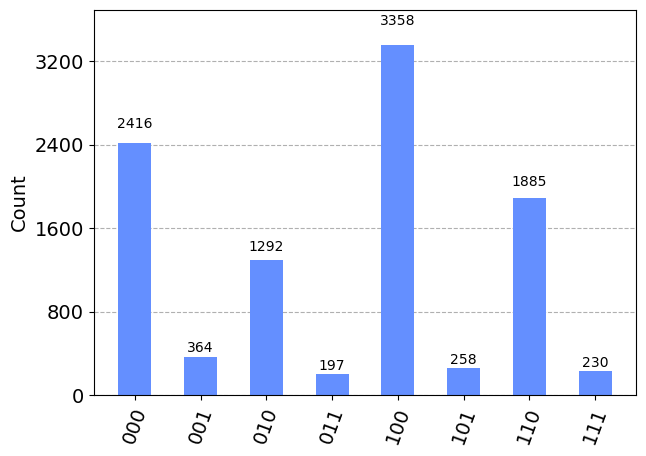

In [24]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum3(a, b)
#run on real quantum computer
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_nairobi')
job = execute(adder, backend, shots=10000)
result = job.result().get_counts()
plot_histogram(result)